In [1]:
#pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df= pd.read_csv('Sentiment_Analysis_Data.csv')

In [4]:
df.head()

,Unnamed: 0,Index,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized_Words,Pos_tags,...,PCA1,PCA2,For_Cluster_Seven,For_Cluster_Ten,neg,neu,pos,compound,Sentiment,Sentiment_Label
0,0,0,"['apple', 'vision', 'pro', 'has', 'ruined', 'm...",Old_Possible8977,1an21fb,2024-02-09 23:34:09,Apple Vision Pro has ruined movies for me,"['apple', 'vision', 'pro', 'ruined', 'movies']","['apple', 'vision', 'pro', 'ruined', 'movies']","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",...,0.369651,0.018061,0,1,0.279,0.541,0.18,-0.2732,-1,negative
1,1,1,"['its', 'too', 'expensive', 'no', 'regrets']",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"['expensive', 'regrets']","['expensive', 'regrets']","[('[', 'RB'), (""'expensive"", 'JJ'), (""'"", ""''""...",...,-0.054405,-0.046932,1,5,0.610,0.390,0.00,-0.5719,-1,negative
2,2,2,"['how', 'to', 'ruin', 'your', 'movie', 'library']",Mequbbal_Trader,1atvcqx,2024-02-18 14:31:17,How to ruin your movie library,"['ruin', 'movie', 'library']","['ruin', 'movie', 'library']","[('[', 'JJ'), (""'ruin"", 'NNP'), (""'"", 'POS'), ...",...,-0.068477,-0.067856,1,5,0.432,0.568,0.00,-0.5859,-1,negative
3,3,3,"['i', 'was', 'really', 'wrong', 'about', 'the'...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"['really', 'wrong', 'avp', 'incredible', 'piec...","['really', 'wrong', 'avp', 'incredible', 'piec...","[('[', 'RB'), (""'really"", 'RB'), (""'"", ""''""), ...",...,-0.113431,0.092884,4,9,0.205,0.795,0.00,-0.6281,-1,negative
4,4,4,"['apple', 'vision', 'pro', 'is', 'the', 'best'...",Deathtosnoopy,1b2jq3m,2024-02-28 22:35:12,Apple vision pro is the best thing to happen t...,"['apple', 'vision', 'pro', 'best', 'thing', 'h...","['apple', 'vision', 'pro', 'best', 'thing', 'h...","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",...,0.209062,-0.007999,0,1,0.000,0.640,0.36,0.7351,1,positive


In [5]:
# Split the data into features (X) and labels (y)
X = df[['PCA1','PCA2','neg','neu','pos']]
y = df['Sentiment']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train

,PCA1,PCA2,neg,neu,pos
29,-0.061090,-0.056510,0.000,1.000,0.000
535,-0.081573,-0.042194,0.000,1.000,0.000
695,0.308821,0.095231,0.000,0.530,0.470
557,-0.066624,-0.030943,0.000,0.690,0.310
836,0.174601,-0.029503,0.000,0.833,0.167
...,...,...,...,...,...
106,-0.074417,-0.047870,0.000,0.901,0.099
270,-0.071373,-0.044755,0.000,1.000,0.000
860,-0.074261,-0.044672,0.000,1.000,0.000
435,-0.086622,0.095153,0.109,0.891,0.000


In [8]:
#X_train.to_csv("Regression_Train_Data.csv")

In [9]:
X_test

,PCA1,PCA2,neg,neu,pos
521,-0.079121,-0.104055,0.000,1.000,0.000
737,-0.072384,-0.045353,0.000,1.000,0.000
740,0.480644,0.102399,0.000,0.667,0.333
660,-0.066343,-0.060302,0.000,1.000,0.000
411,-0.115684,0.187768,0.000,1.000,0.000
...,...,...,...,...,...
408,-0.109286,0.203030,0.000,1.000,0.000
332,-0.072179,-0.070221,0.143,0.857,0.000
208,-0.068481,-0.063767,0.000,0.828,0.172
613,0.260012,0.005661,0.000,0.818,0.182


In [10]:
#X_test.to_csv("Regression_Test_Data.csv")

In [11]:
# Vectorize the text data
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = mlr_model.predict(X_test)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("R^2 Score:", r2*100)
print("Mean Squared Error:", mse)

R^2 Score: 74.05243926945293
Mean Squared Error: 0.10233717952127762


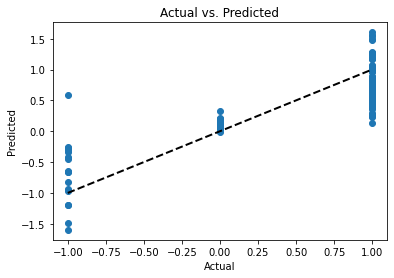

In [15]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plot the diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

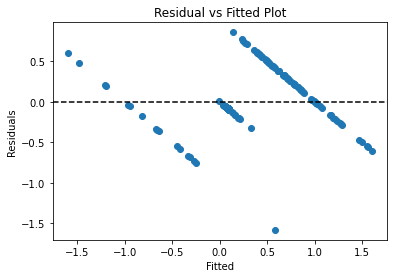

In [16]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted Plot')
plt.axhline(y=0, color='k', linestyle='--')  # Add horizontal line at y=0
plt.show()

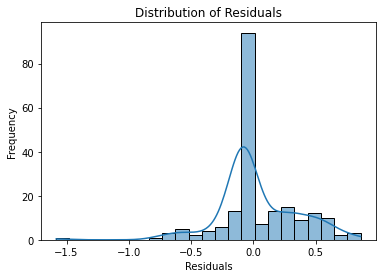

In [17]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

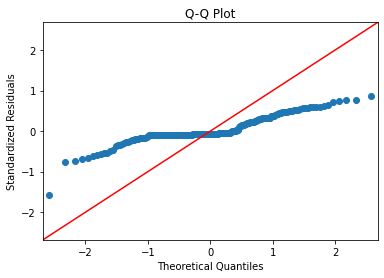

In [18]:
fig = sm.qqplot(residuals, line='45')

# Add labels and title
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.title('Q-Q Plot')

# Show plot
plt.show()

In [22]:
X_train = sm.add_constant(X_train)  # Add a constant term for the intercept
model = sm.OLS(y_train, X_train)    # Create an Ordinary Least Squares (OLS) model
result = model.fit()                # Fit the model to the training data

In [23]:
# Print the summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     454.9
Date:                Sun, 05 May 2024   Prob (F-statistic):          3.08e-230
Time:                        16:56:54   Log-Likelihood:                -279.39
No. Observations:                 800   AIC:                             570.8
Df Residuals:                     794   BIC:                             598.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -416.4008    143.347     -2.905      0.0